In [1]:
import random 
import pandas as pd
import numpy as np

In [2]:
cars = pd.read_csv('porsche_cars.csv')

In [3]:
cars.drop(columns=cars.columns[0], axis = 1, inplace = True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Марка                   1295 non-null   object 
 1   Модель                  1295 non-null   object 
 2   Год выпуска             1295 non-null   int64  
 3   Город продажи           1295 non-null   object 
 4   Тип топлива             1286 non-null   object 
 5   Объем двигателя, л.     1276 non-null   float64
 6   Мощность, л.с.          1293 non-null   float64
 7   Коробка передач         1293 non-null   object 
 8   Привод                  1293 non-null   object 
 9   Цвет                    1277 non-null   object 
 10  Пробег, км              1224 non-null   float64
 11  Поколение               1255 non-null   object 
 12  Количество регистраций  1072 non-null   float64
 13  Цена, руб.              1295 non-null   int64  
dtypes: float64(4), int64(2), object(8)
memor

### Создаем классы автомобилей в зависимости от цены
Параметр цены не будем включать в обучение 

In [4]:
prices = cars['Цена, руб.']

In [5]:
def price_classification(prices):
    class_cars = []
    for i in range(len(prices)):
        if prices[i] < 2000000:
            class_cars.append('D')
        elif 2000000 <= prices[i] <= 3500000:
            class_cars.append('C')
        elif 3500000 <= prices[i] <= 8500000:
            class_cars.append('B')
        else:
            class_cars.append('A')
    return class_cars

In [6]:
class_cars = price_classification(prices)
cars['Классификация цены'] = class_cars

In [7]:
cars.groupby(cars['Классификация цены']).count()

,Марка,Модель,Год выпуска,Город продажи,Тип топлива,"Объем двигателя, л.","Мощность, л.с.",Коробка передач,Привод,Цвет,"Пробег, км",Поколение,Количество регистраций,"Цена, руб."
Классификация цены,,,,,,,,,,,,,,
A,250,250,250,250,242,237,250,250,250,245,187,231,129,250
B,326,326,326,326,326,324,326,325,326,322,325,319,277,326
C,379,379,379,379,379,377,379,379,379,377,376,369,359,379
D,340,340,340,340,339,338,338,339,338,333,336,336,307,340


### Обработка данных

In [8]:
cars.loc[cars['Модель'] == 'Taycan', 'Тип топлива'] = 'электро'
cars.loc[cars['Модель'] == 'Taycan', 'Объем двигателя, л.'] = 0
cars.loc[cars['Коробка передач'] == 'автомат', 'Коробка передач'] = 'АКПП' 
cars.loc[cars['Пробег, км'] == 0, 'Количество регистраций'] = 0

In [9]:
reg_mean = cars.loc[cars['Классификация цены'] == 'A', 'Количество регистраций'].mean()
cars.loc[cars['Классификация цены'] == 'A', 'Количество регистраций'] = cars.loc[cars['Классификация цены'] == 'A', 'Количество регистраций'].fillna(reg_mean)

probeg_mean = cars.loc[cars['Классификация цены'] == 'A', 'Пробег, км'].mean()
cars.loc[cars['Классификация цены'] == 'A', 'Пробег, км'] = cars.loc[cars['Классификация цены'] == 'A', 'Пробег, км'].fillna(probeg_mean)
cars.loc[cars['Классификация цены'] == 'A']

,Марка,Модель,Год выпуска,Город продажи,Тип топлива,"Объем двигателя, л.","Мощность, л.с.",Коробка передач,Привод,Цвет,"Пробег, км",Поколение,Количество регистраций,"Цена, руб.",Классификация цены
4,Porsche,Cayenne,2022,Москва,бензин,3.0,340.0,АКПП,4WD,черный,0.000000,3 поколение,0.000000,12900000,A
6,Porsche,Cayenne Coupe,2019,Челябинск,бензин,3.0,340.0,АКПП,4WD,черный,35500.000000,1 поколение,1.466165,8600000,A
17,Porsche,Macan,2021,Новосибирск,бензин,2.0,251.0,АКПП,4WD,белый,9000.000000,NaN,1.000000,9000000,A
19,Porsche,Cayenne,2019,Новосибирск,бензин,3.0,340.0,АКПП,4WD,серый,69427.000000,3 поколение,1.000000,8550000,A
24,Porsche,Cayenne,2020,Новосибирск,бензин,4.0,550.0,АКПП,4WD,белый,52869.000000,3 поколение,1.000000,11000000,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,Porsche,Cayenne Coupe,2022,Казань,бензин,4.0,460.0,АКПП,4WD,коричневый,20.000000,1 поколение,1.466165,18700000,A
1278,Porsche,Cayenne,2019,Хабаровск,бензин,2.9,440.0,АКПП,4WD,белый,10989.000000,3 поколение,4.000000,10500000,A
1281,Porsche,Cayenne,2022,Санкт-Петербург,бензин,3.0,340.0,АКПП,4WD,бежевый,19154.197861,3 поколение,1.000000,12393500,A
1292,Porsche,Cayenne Coupe,2022,Санкт-Петербург,бензин,3.0,340.0,АКПП,4WD,белый,9785.000000,1 поколение,1.000000,12550000,A


In [10]:
reg_mean = cars.loc[cars['Классификация цены'] == 'B', 'Количество регистраций'].mean()
cars.loc[cars['Классификация цены'] == 'B', 'Количество регистраций'] = cars.loc[cars['Классификация цены'] == 'B', 'Количество регистраций'].fillna(reg_mean)

In [128]:
cars2 = cars.copy(deep = True) # копировани массива, чтобы значения были независисмы

### One Hot Encoding

In [129]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder 

In [130]:
#encoder = OneHotEncoder(handle_unknown='ignore')
#encoder_df = pd.DataFrame(encoder.fit_transform(cars2[['Модель']]).toarray())
#price = cars2['Классификация цены']
#cars2.drop(columns=cars2.columns[-1], axis = 1, inplace = True)
#cars2 = cars2.join(encoder_df)
#cars2['Классификация цены'] = price
#cars2

,Марка,Модель,Год выпуска,Город продажи,Тип топлива,"Объем двигателя, л.","Мощность, л.с.",Коробка передач,Привод,Цвет,...,3,4,5,6,7,8,9,10,11,Классификация цены
0,Porsche,Macan,2014,Симферополь,бензин,3.6,400.0,робот,4WD,серый,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,B
1,Porsche,Cayenne,2019,Екатеринбург,бензин,3.0,340.0,АКПП,4WD,коричневый,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,B
2,Porsche,Panamera,2015,Красноярск,бензин,3.6,310.0,робот,4WD,белый,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,B
3,Porsche,Cayenne,2007,Томск,бензин,4.8,385.0,АКПП,4WD,черный,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,D
4,Porsche,Cayenne,2022,Москва,бензин,3.0,340.0,АКПП,4WD,черный,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,Porsche,Cayenne,2015,Новосибирск,дизель,3.0,245.0,АКПП,4WD,черный,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,B
1291,Porsche,Cayenne,2006,Курган,бензин,4.5,340.0,АКПП,4WD,черный,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,D
1292,Porsche,Cayenne Coupe,2022,Санкт-Петербург,бензин,3.0,340.0,АКПП,4WD,белый,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,A
1293,Porsche,Cayenne,2011,Казань,бензин,4.8,400.0,АКПП,4WD,белый,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,C


### Удаление столбцов 

In [131]:
cars2.drop(columns=cars2.columns[0], axis = 1, inplace = True)
cars2.drop(columns=cars2.columns[0], axis = 1, inplace = True)
cars2.drop(columns=cars2.columns[1], axis = 1, inplace = True)
cars2.drop(columns=cars2.columns[1], axis = 1, inplace = True)
cars2.drop(columns=cars2.columns[3], axis = 1, inplace = True)
cars2.drop(columns=cars2.columns[3], axis = 1, inplace = True)
cars2.drop(columns=cars2.columns[3], axis = 1, inplace = True)
cars2.drop(columns=cars2.columns[4], axis = 1, inplace = True)
cars2.drop(columns=cars2.columns[5], axis = 1, inplace = True)
cars2

,Год выпуска,"Объем двигателя, л.","Мощность, л.с.","Пробег, км",Количество регистраций,0,1,2,3,4,5,6,7,8,9,10,11,Классификация цены
0,2014,3.6,400.0,87000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,B
1,2019,3.0,340.0,101156.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,B
2,2015,3.6,310.0,61000.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,B
3,2007,4.8,385.0,265000.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,D
4,2022,3.0,340.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,2015,3.0,245.0,98000.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,B
1291,2006,4.5,340.0,250000.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,D
1292,2022,3.0,340.0,9785.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,A
1293,2011,4.8,400.0,182000.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,C


### Удаление пропусков 

In [132]:
cars2 = cars2.dropna()
len(cars2)

1233

In [133]:
cars2.groupby(cars2['Классификация цены']).count()

,Год выпуска,"Объем двигателя, л.","Мощность, л.с.","Пробег, км",Количество регистраций,0,1,2,3,4,5,6,7,8,9,10,11
Классификация цены,,,,,,,,,,,,,,,,,
A,249,249,249,249,249,249,249,249,249,249,249,249,249,249,249,249,249
B,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325,325
C,355,355,355,355,355,355,355,355,355,355,355,355,355,355,355,355,355
D,304,304,304,304,304,304,304,304,304,304,304,304,304,304,304,304,304


### Создаем обучающую и тестовую выборку

In [134]:
labels = cars2[cars2.columns[-1]].values
feature_matrix = cars2[cars2.columns[:-1]].values

In [135]:
from sklearn.model_selection import train_test_split

In [136]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(
    feature_matrix, labels, test_size=0.2, random_state=42)

### Нормируем данные

In [137]:
from sklearn import preprocessing

In [138]:
scaler = preprocessing.StandardScaler().fit(train_feature_matrix)
scaler
X_scaled = scaler.transform(train_feature_matrix)
scaled_test_matrix = scaler.transform(test_feature_matrix)

### Имортируем модели

In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [140]:
clf = DecisionTreeClassifier(max_depth = 3, random_state=42)
clf = clf.fit(X_scaled, train_labels)
y_pred = clf.predict(scaled_test_matrix)

### Строим дерево решений 

In [141]:
from sklearn import tree
import matplotlib.pyplot as plt

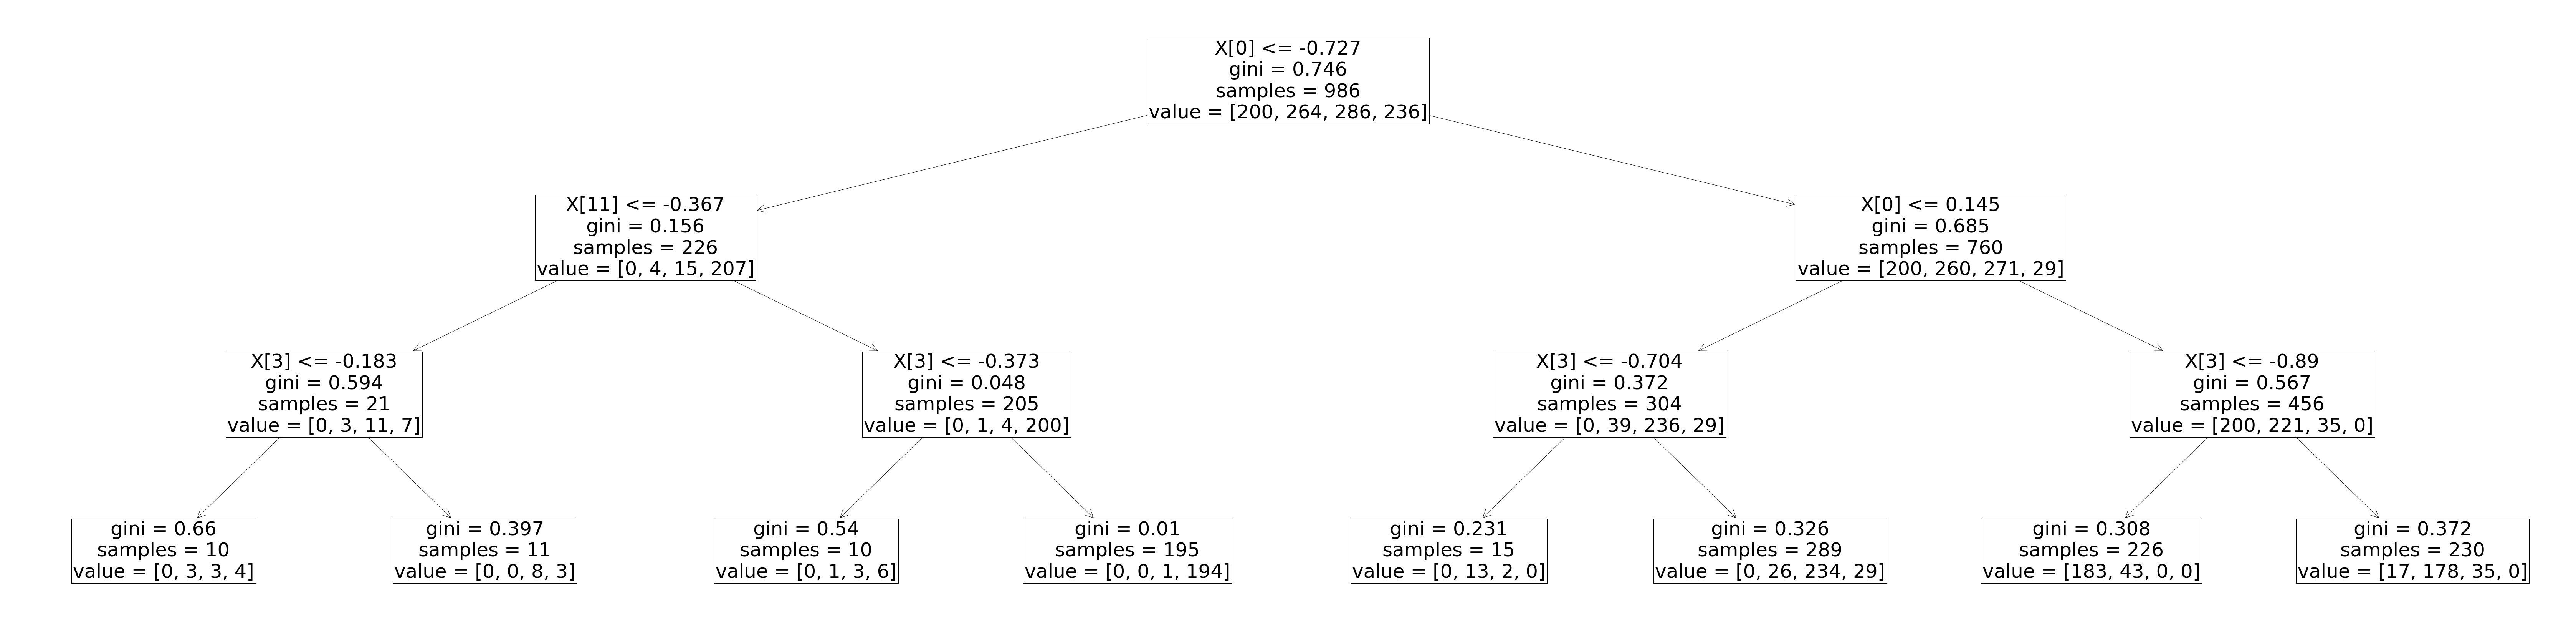

In [142]:
plt.figure(figsize=(120,30))  # set plot size (denoted in inches)
tree.plot_tree(clf, fontsize=50)
plt.show()

### Нормируем данные и строим логистическую регрессию 

In [143]:
clf2 = LogisticRegression(random_state=42)
clf2 = clf2.fit(X_scaled, train_labels)

y_pred2 = clf2.predict(scaled_test_matrix)

In [144]:
clf2.predict_proba(scaled_test_matrix)

array([[5.17134441e-04, 4.06241671e-01, 5.93220326e-01, 2.08684065e-05],
       [4.60948089e-06, 7.37694341e-02, 8.29494142e-01, 9.67318139e-02],
       [6.24304231e-01, 3.75691754e-01, 4.01449992e-06, 6.55200843e-13],
       [5.81310776e-18, 6.09524145e-07, 1.58727898e-02, 9.84126601e-01],
       [6.45847429e-12, 1.13885712e-05, 1.82968792e-02, 9.81691732e-01],
       [9.89585043e-01, 1.03846603e-02, 3.02965778e-05, 2.31239120e-10],
       [5.46465468e-01, 4.53524942e-01, 9.59013770e-06, 4.28691309e-13],
       [2.16265844e-02, 9.35469120e-01, 4.29042673e-02, 2.86044353e-08],
       [4.15834812e-07, 6.64284084e-02, 8.36407291e-01, 9.71638847e-02],
       [2.24091567e-06, 1.93210983e-01, 8.04715276e-01, 2.07150007e-03],
       [3.02703067e-03, 4.18801627e-01, 5.78145588e-01, 2.57538750e-05],
       [5.23614991e-01, 4.72869505e-01, 3.51550347e-03, 5.80755613e-10],
       [9.99725214e-01, 2.74639077e-04, 1.46734584e-07, 3.27448118e-13],
       [7.97431403e-11, 2.75940104e-03, 5.41637180e

### Строим KNN

In [145]:
from sklearn.model_selection import GridSearchCV

In [146]:
clf3 = KNeighborsClassifier(n_neighbors = 1)

params = {'n_neighbors': [2, 3, 4, 5, 6],
         'metric': ['manhattan', 'euclidean'],
         'weights': ['uniform', 'distance']}

clf3_grid = GridSearchCV(clf3, params, cv=5, scoring='accuracy', n_jobs=-1)
clf3_grid = clf3_grid.fit(X_scaled, train_labels)

print(clf3_grid.best_params_)

{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}


In [147]:
y_pred3 = clf3_grid.predict(scaled_test_matrix)

In [148]:
from sklearn.metrics import accuracy_score

#### Точнось дерева решений

In [149]:
accuracy_score(test_labels, y_pred) 

0.8461538461538461

#### Точность логистической регрессии 

In [150]:
accuracy_score(test_labels, y_pred2)

0.854251012145749

#### Точность KNN

In [151]:
accuracy_score(test_labels, y_pred3)

0.8340080971659919

### Ансамбль 
В процессе ... 

In [152]:
from sklearn.ensemble import VotingClassifier

In [153]:
eclf1 = VotingClassifier(estimators=[('dt', clf), ('lr', clf2), ('knn', clf3_grid)], voting = 'hard')

In [154]:
eclf1.fit(X_scaled, train_labels)
y_pred4 = eclf1.predict(scaled_test_matrix)

In [155]:
accuracy_score(test_labels, y_pred4)

0.8461538461538461

In [156]:
from sklearn.metrics import f1_score

In [157]:
f1_score(test_labels, y_pred, average='macro')

0.8486088229444919

In [158]:
from sklearn.metrics import classification_report

In [159]:
print(classification_report(test_labels, y_pred4))

              precision    recall  f1-score   support

           A       0.96      0.96      0.96        49
           B       0.81      0.84      0.82        61
           C       0.73      0.83      0.78        69
           D       0.95      0.79      0.86        68

    accuracy                           0.85       247
   macro avg       0.86      0.85      0.86       247
weighted avg       0.86      0.85      0.85       247

